# Portfolio Simulation with Monte Carlo

Source:

- https://www.youtube.com/watch?v=6-dhdMDiYWQ&ab_channel=QuantPy

- https://whalewisdom.com/filer/harvard-management-co-inc#tabholdings_tab_link (Harvard Management Company's top portfolio choices)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr

First we find a way of grabbing price data for all stocks in a portfolio and inferring the:

- mean returns

- the covariance matrix

In [4]:
def get_portfolio_data(portfolio, start, end):
    portfolio_data = pdr.get_data_yahoo(portfolio, start, end)
    portfolio_data = portfolio_data['Close']
    returns = portfolio_data.pct_change()
    mean_returns = returns.mean()
    cov_matrix = returns.cov()

    return mean_returns, cov_matrix

end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=365)

portfolio = ['GOOGL','META','LNW','ABCL','EQRX','PCT','GRAB']

mean_ret, cov_mat = get_portfolio_data(portfolio, start_date, end_date)

print(mean_ret)

Symbols
GOOGL   -0.000264
META    -0.002220
LNW      0.000081
ABCL     0.000087
EQRX    -0.000718
PCT      0.001008
GRAB    -0.002414
dtype: float64


In [6]:
portfolio_weights = [0.3042, 0.2121, 0.1457, 0.0506, 0.0286, 0.0215, 0.0157]
total = sum(portfolio_weights)
portfolio_weights = [i/total for i in portfolio_weights]
print(portfolio_weights)
print(sum(portfolio_weights))

[0.3908016443987668, 0.2724820143884893, 0.18717882836587876, 0.06500513874614595, 0.0367420349434738, 0.027620760534429602, 0.020169578622816035]
1.0000000000000004


Now doing the Monte Carlo simulations:

Suppose that the vector of returns $\vec{R_t}\sim\mathcal{\mu, \Sigma}$. Then we use the Cholesky decomposition of the covariance matrix by its nonsingularity:

$$\Sigma = LL^T$$

where $\vec{R_t}=\mu+L\vec{Z_t}$ and $Z_t\sim\mathcal{N}(0,I)$

In [20]:
num_sims = 10000

T = 200

means = np.full(shape=(T, len(portfolio)), fill_value=mean_ret)

means = means.T #to be able to use it in matrix operations

portfolio_sims = np.full(shape=(T, num_sims), fill_value=0.0)

starting_value = 10000

for i in range(num_sims):
    
    Z = np.random.normal(size = (T, len(portfolio))) # multivariate standard normal vector
    
    L = np.linalg.cholesky(cov_mat) # finds the Cholesky decomposition matrix L
    
    daily_returns = means + np.inner(L, Z) # generates R_t
    
    portfolio_sims[:,i] = np.cumprod(np.inner(portfolio_weights, daily_returns.T)+1) * starting_value
    
#plt.plot(portfolio_sims)
    
#plt.show

Plotting the histogram of the portfolio value across many simulations at the end of the given time

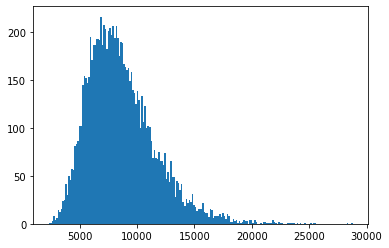

In [22]:
plt.hist(portfolio_sims[T-1,:], bins=200)
plt.show()